Импорт библиотеки tensorflow и загрузка изображений из базы MNIST

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

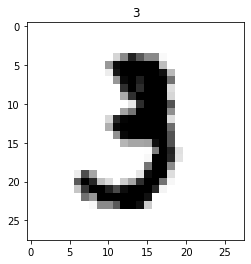

In [6]:
plt.title(y_train[10])
plt.imshow(x_train[10], cmap=plt.get_cmap('gray_r'))
plt.show()

In [7]:
def display_digit(num):
    label = y_train[num]
    image = x_train[num]
    plt.title('Example: {}  Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

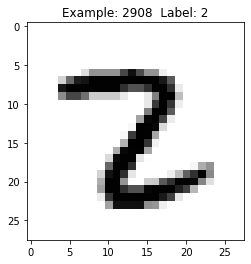

In [8]:
display_digit(2908)

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.0),
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.0),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
____________________________________________________

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=30)



Epoch 1/30
1875/1875 [==============================] - 1s 754us/step - loss: 0.2568 - accuracy: 0.9283
Epoch 2/30
1875/1875 [==============================] - 2s 889us/step - loss: 0.2523 - accuracy: 0.9289
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2523 - accuracy: 0.9293
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2453 - accuracy: 0.9307
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2486 - accuracy: 0.9301
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2467 - accuracy: 0.9310: 0s - loss: 0.2418 - 
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2462 - accuracy: 0.9314
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2438 - accuracy: 0.9297
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2433 - accuracy: 0.9305
Epoch 10/30
1875/1875 [==============================] -

In [22]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

313/313 [==============================] - 0s 580us/step - loss: 0.2862 - accuracy: 0.9263
Loss = 0.2862301766872406, accuracy = 0.9262999892234802


In [23]:
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

1875/1875 [==============================] - 2s 902us/step - loss: 0.2089 - accuracy: 0.9405
Loss = 0.2089369297027588, accuracy = 0.9404500126838684
